**importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**importing dataset**

In [ ]:
df = pd.read_csv("dataset1.csv")

**printing dataset**

In [ ]:
print(df)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0         

**printing first 10 lines of dataset**

In [ ]:
print(df.head(10))

   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   
5             0       1         1          1   25       1       0   
6             0       1         0          1   30       1       0   
7             0       1         1          1   25       1       0   
8             2       1         1          1   30       1       0   
9             0       0         0          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0          

**describing numerical stats for the columns of dataset**

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**general information about dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

**to check if null values are present**

In [ ]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**to check if there are any duplicate values in our dataset**

In [ ]:
df.duplicated().sum()

23899

In [ ]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (253680, 22)


**dropping duplicate values**

In [ ]:
df.drop_duplicates()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
original_shape = df.shape

df = df.drop_duplicates()
new_shape = df.shape

df.fillna(0)
print(new_shape)

if original_shape == new_shape:
  print("no duplicate values found")
else:
  print("duplicate values were present and have been removed")

(229781, 22)
duplicate values were present and have been removed


**checking if the values have been removed**

In [ ]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (229781, 22)


# DATA VISUALIZATION

count plot

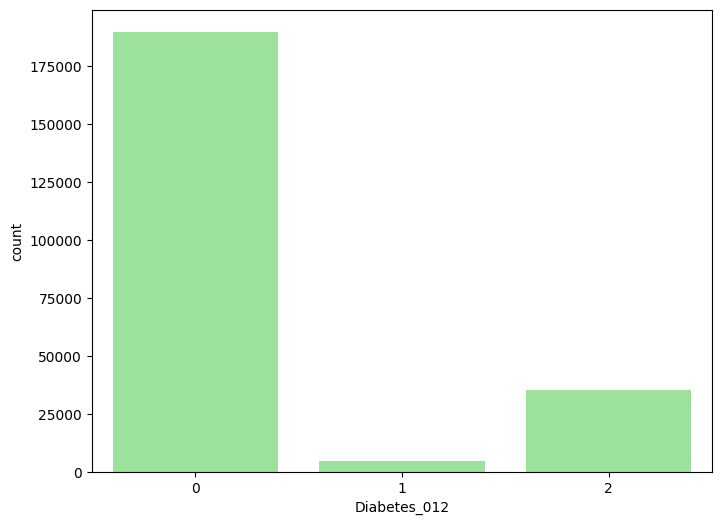

In [ ]:
plt.figure(figsize=(8,6))
sb.countplot(x = 'Diabetes_012', data = df, color='lightgreen')
plt.show()

**observing outliers**

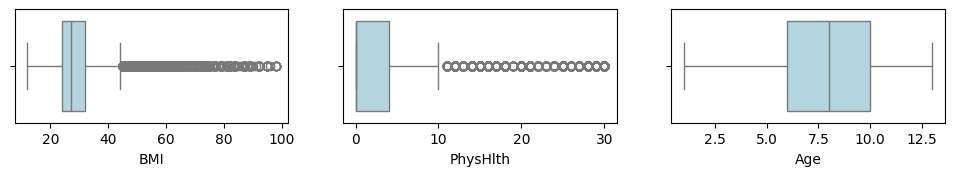

In [ ]:
#some error in graph - Age
plt.figure(figsize = (12,5))
for i, col in enumerate (['BMI','PhysHlth','Age']):
  plt.subplot(3,3, i+1)
  sb.boxplot(x=col, data = df, color='lightblue')
plt.show()

**Histogram**

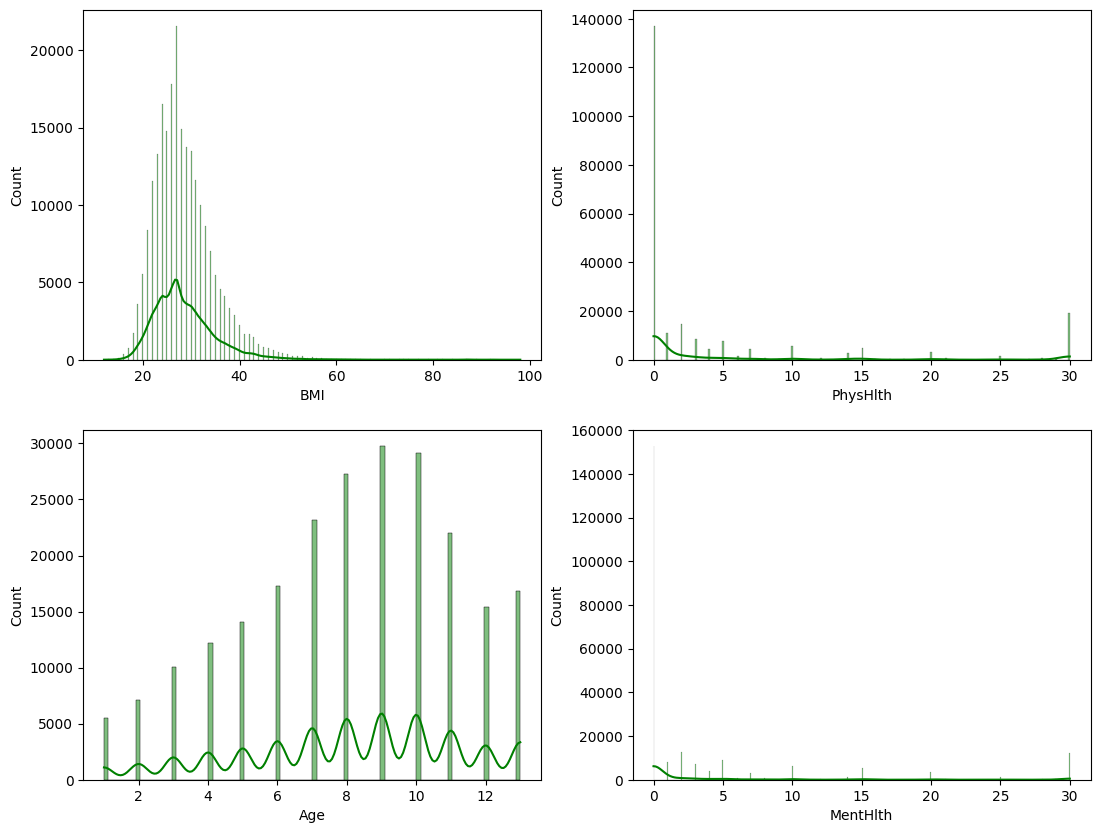

In [ ]:
plt.figure(figsize = (13,10))
for i, col in enumerate (['BMI','PhysHlth','Age','MentHlth']):
  plt.subplot(2,2, i+1)
  sb.histplot(x=col, data = df, kde= True, color='green')
plt.show()

**heat map**

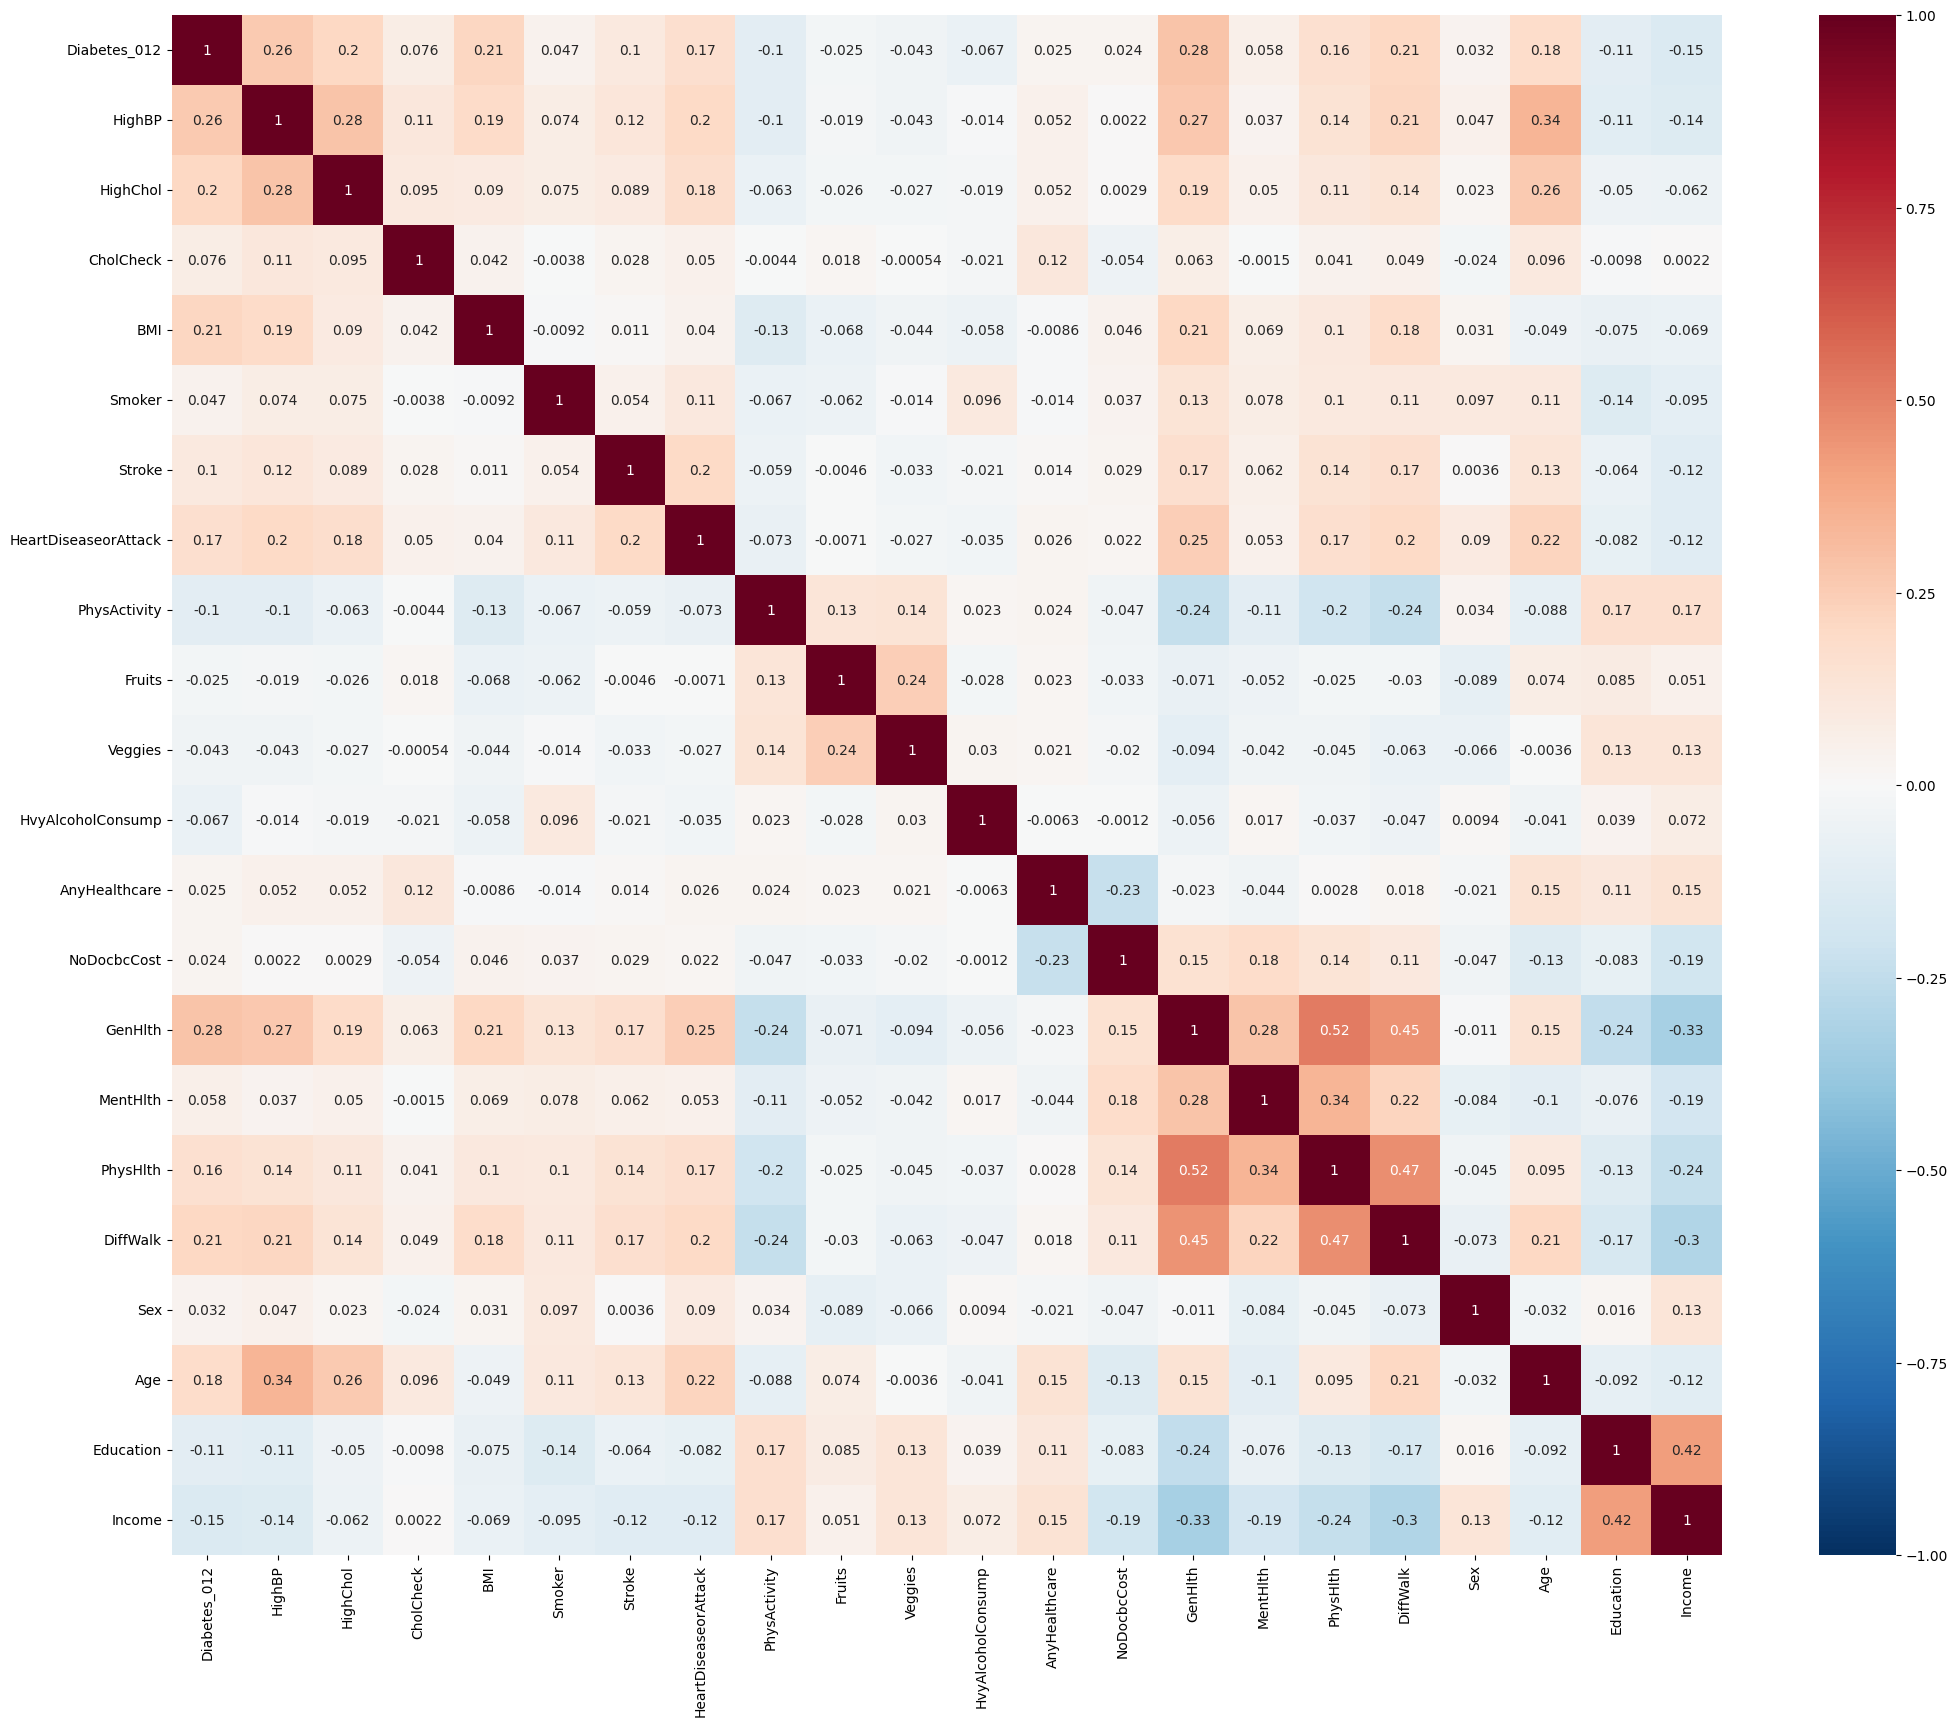

In [ ]:
plt.figure(figsize=(25,20))
sb.heatmap(df.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

# **ALGORITHMS**

**Standard scaling and label encoding**

In [ ]:
columns_to_scale = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                    'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Create a DataFrame with the scaled data
X = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Add the 'Diabetes_012' column to the scaled DataFrame
X['Diabetes_012'] = df['Diabetes_012']

**seeing head of scaled dataframe**

In [ ]:
X.head(7)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_012
0,1.095675,1.124132,0.205356,1.667220,1.071208,-0.216455,-0.339257,-1.658403,-1.258473,0.508092,...,0.238745,-0.319852,2.253111,1.879074,1.141300,2.095383,0.295241,-0.987588,-1.381324,0.0
1,-0.912679,-0.889575,-4.869594,-0.543101,1.071208,-0.216455,-0.339257,0.602990,-1.258473,-1.968149,...,-4.188578,3.126450,0.374618,-0.454434,-0.516791,-0.477240,-0.351213,1.026729,-2.337131,0.0
2,1.095675,1.124132,0.205356,-0.101037,-0.933526,-0.216455,-0.339257,-1.658403,0.794614,-1.968149,...,0.238745,3.126450,2.253111,3.434746,2.799391,2.095383,0.295241,-0.987588,1.008193,0.0
3,1.095675,-0.889575,0.205356,-0.248391,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.477240,0.941695,-1.994746,0.052387,0.0
4,1.095675,1.124132,0.205356,-0.690456,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.065516,-0.516791,-0.477240,0.941695,0.019571,-0.903420,0.0
5,1.095675,1.124132,0.205356,-0.543101,1.071208,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.295713,-0.477240,0.618468,1.026729,1.008193,0.0
6,1.095675,-0.889575,0.205356,0.193673,1.071208,-0.216455,-0.339257,-1.658403,-1.258473,-1.968149,...,0.238745,-0.319852,0.374618,-0.454434,1.030760,-0.477240,0.295241,1.026729,0.530290,0.0


**output column**

In [ ]:
Y = df["Diabetes_012"]
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    2
253677    0
253678    0
253679    2
Name: Diabetes_012, Length: 229781, dtype: int64


**dropping NULL values**

In [ ]:
X.dropna(how='all', inplace=True)

In [ ]:
nan_df = df.isna()
print(nan_df)

        Diabetes_012  HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  \
0              False   False     False      False  False   False   False   
1              False   False     False      False  False   False   False   
2              False   False     False      False  False   False   False   
3              False   False     False      False  False   False   False   
4              False   False     False      False  False   False   False   
...              ...     ...       ...        ...    ...     ...     ...   
253675         False   False     False      False  False   False   False   
253676         False   False     False      False  False   False   False   
253677         False   False     False      False  False   False   False   
253678         False   False     False      False  False   False   False   
253679         False   False     False      False  False   False   False   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

In [ ]:
df.dropna()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


**dividing our data into 4 parts: X_train, X_test, Y_train, Y_test**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split (X,Y, test_size=0.3,random_state = 0)

In [ ]:
print(X_train)

          HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
80559   1.095675  1.124132   0.205356 -0.248391  1.071208 -0.216455   
91816  -0.912679 -0.889575   0.205356 -0.985165 -0.933526 -0.216455   
69741  -0.912679 -0.889575   0.205356  0.488382 -0.933526 -0.216455   
149845 -0.912679 -0.889575   0.205356 -0.985165 -0.933526 -0.216455   
154064 -0.912679 -0.889575   0.205356 -0.248391  1.071208 -0.216455   
...          ...       ...        ...       ...       ...       ...   
176963  1.095675  1.124132   0.205356 -1.279874  1.071208 -0.216455   
117952  1.095675 -0.889575  -4.869594  2.993412  1.071208 -0.216455   
173685 -0.912679 -0.889575   0.205356 -0.837810  1.071208 -0.216455   
43567  -0.912679 -0.889575   0.205356  0.488382 -0.933526 -0.216455   
199340 -0.912679 -0.889575   0.205356  0.635737  1.071208 -0.216455   

        HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
80559               2.947618      0.602990  0.794614  0.508092  ...   
91816

# **decision tree**

In [ ]:
# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on X_train
imputer.fit(X_train)

# Transform X_train
X_train_imputed = imputer.transform(X_train)

# Initialize our DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Fit your DecisionTreeClassifier on X_train_imputed
classifier.fit(X_train_imputed, Y_train)

DecisionTreeClassifier()

In [ ]:
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test data  - horizontal printing
predictions_dt = classifier.predict(X_test_imputed)
result_dt = list(zip(Y_test, predictions_dt))
# Print the predictions
print(result_dt)

#can also use this for printing output in a vertical manner

# predictions = classifier.predict(X_test_imputed)
# result = list(zip(Y_test, predictions))
# # Print the predictions
# for original, predicted in result:
#     print(f"Original: {original}, Predicted: {predicted}")

[(0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (2, 2), (2, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 2), (2, 2), (0, 0), (2, 0), (2, 0), (0, 0), (2, 0), (2, 2), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (2, 0), (0, 2), (2, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 2), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (2, 0),

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions_dt)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7390295205628491


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_dt)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[47426  1375  7949]
 [ 1000    52   346]
 [ 6919   401  3467]]


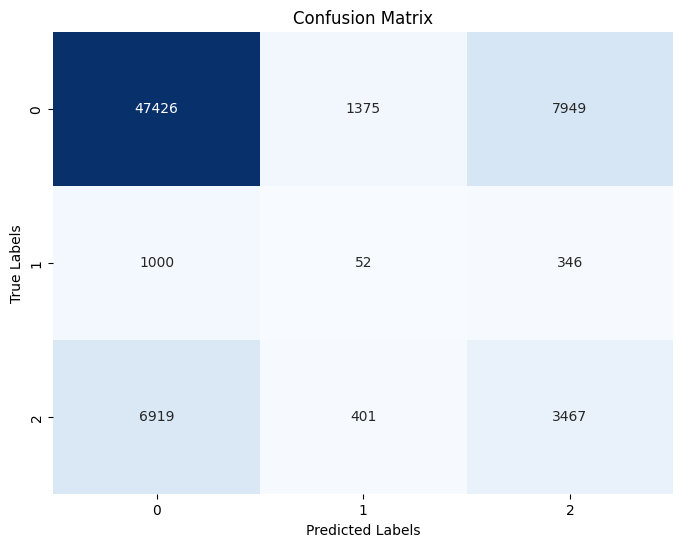

In [ ]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Print classification report
print("report for decision tree.")
print(metrics.classification_report(Y_test, predictions_dt))

report for decision tree.
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     56750
           1       0.03      0.04      0.03      1398
           2       0.29      0.32      0.31     10787

    accuracy                           0.74     68935
   macro avg       0.39      0.40      0.40     68935
weighted avg       0.75      0.74      0.75     68935



# **Random forest**

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

classifier_rf = RandomForestClassifier(n_estimators=10, criterion="entropy")

# Fit your RandomForestClassifier on X_train_imputed
classifier_rf.fit(X_train_imputed, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

**result  of random forest**

In [ ]:
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test data  - horizontal printing
predictions_rf = classifier.predict(X_test_imputed)
result_rf = list(zip(Y_test, predictions_rf))
# Print the predictions
print(result_rf)

[(0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (2, 2), (2, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 2), (2, 2), (0, 0), (2, 0), (2, 0), (0, 0), (2, 0), (2, 2), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (2, 0), (0, 2), (2, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 2), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (2, 0),

**accuracy of random forest**

In [ ]:
# Preprocess X_test similarly to X_train
X_test_imputed = imputer.transform(X_test)

# Predict using the trained classifier
Y_pred = classifier_rf.predict(X_test_imputed)

accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8165518241822006


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[54244    88  2418]
 [ 1218     3   177]
 [ 8717    28  2042]]


In [ ]:
# Print classification report
print('classification report for random forest')
print(classification_report(Y_test, Y_pred))

classification report for random forest
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     56750
           1       0.03      0.00      0.00      1398
           2       0.44      0.19      0.26     10787

    accuracy                           0.82     68935
   macro avg       0.44      0.38      0.39     68935
weighted avg       0.77      0.82      0.78     68935



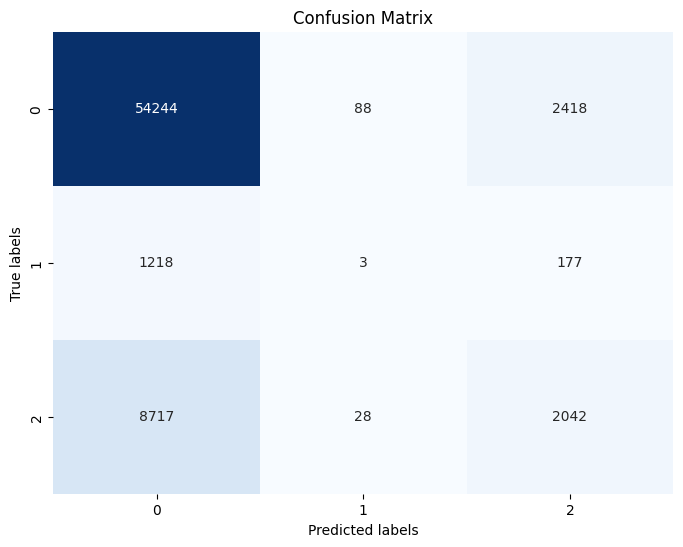

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **KNN**

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the KNN classifier
k = 3  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test_imputed)

In [ ]:
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test data  - horizontal printing
predictions_k = classifier.predict(X_test_imputed)
result_k = list(zip(Y_test, predictions_k))
# Print the predictions
print(result_rf)

[(0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (2, 2), (2, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 2), (2, 2), (0, 0), (2, 0), (2, 0), (0, 0), (2, 0), (2, 2), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (0, 2), (2, 0), (0, 2), (2, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 2), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (2, 0),

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7992021469500253


In [ ]:
cm = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[52559    88  4103]
 [ 1145     5   248]
 [ 8232    26  2529]]


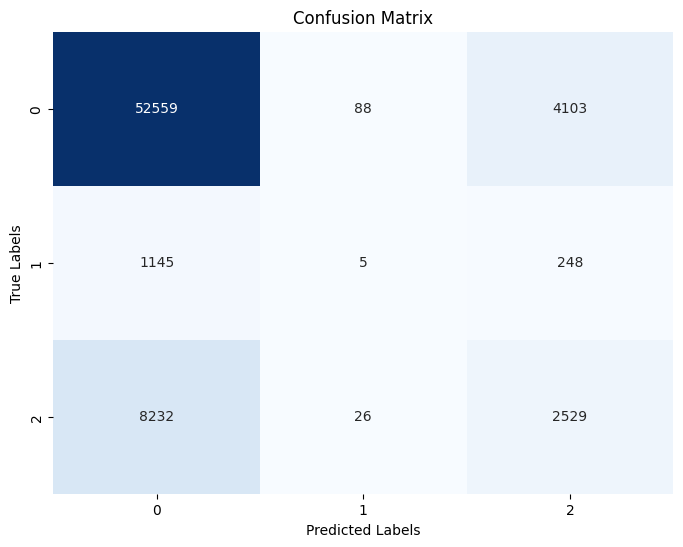

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
knn_report = classification_report(Y_test, y_pred)

print("Classification Report for KNN:")
print(knn_report)

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     56750
           1       0.04      0.00      0.01      1398
           2       0.37      0.23      0.29     10787

    accuracy                           0.80     68935
   macro avg       0.42      0.39      0.39     68935
weighted avg       0.76      0.80      0.77     68935

